<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/trabalhos-UERJ-analise-de-dados/blob/main/Teste_1_Programa%C3%A7%C3%A3o_Linear_no_AMPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q amplpy

In [2]:
from amplpy import AMPL, tools
ampl = tools.ampl_notebook(
    modules=["highs"], # modules to install
    license_uuid="default", # license to use
    g=globals()) # instantiate AMPL object and register magics

Using default Community Edition License for Colab. Get yours at: https://ampl.com/ce
Licensed to AMPL Community Edition License for the AMPL Model Colaboratory (https://ampl.com/colab).


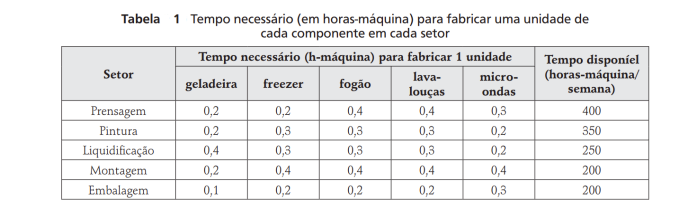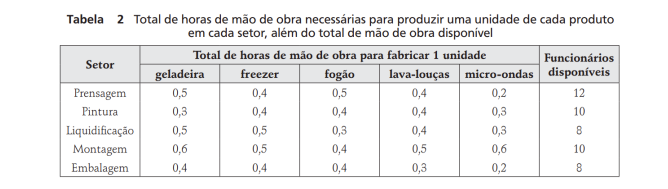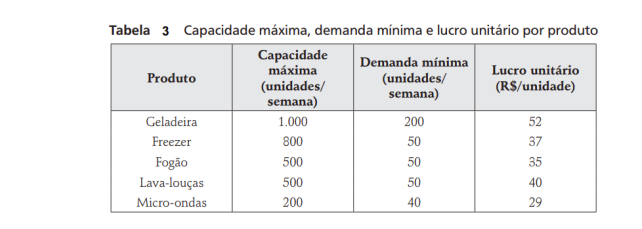

## Modelo

**Variáveis de decisão:**

$X_i$ = produtos (1, geladeira;
                  2, freezer;
                  3, fogão ;
                  4, lava-louças;
                  5, micro-ondas)

**Função-objetivo:**

$Lucro = \sum_{i} lucro_i * X_i$

**Restrições:**

$\sum_i Hmaquina_{ij} * X_i \leq tempoDisponívelMaquina_j$ para cada processo $j$
                  (1, prensagem;
                  2, Pintura;
                  3, Liquidificação;
                  4, Montagem;
                  5, Embalagem)


$HHdisponível_j = 40*funcionariosDisponíveis_j$

$\sum_i HHmaquina_{ij} * X_i \leq HHdisponível_j$ para cada processo $j$
                  (1, prensagem;
                  2, Pintura;
                  3, Liquidificação;
                  4, Montagem;
                  5, Embalagem)

$X_i \geq demandaMinima_i$

$X_i \leq capacidadeMáxima_i$


In [3]:
%%ampl_eval
reset;

set Produtos;
set Processos;

var Quantidade {i in Produtos} >= 0;

param tempo_disponível_maquina {Processos} >=0;
param HHdisponivel {Processos} >= 0;
param demanda_minima {Produtos} >=0;
param Capacidade_maxima  {Produtos} >=0;
param lucro_unitario {Produtos} >=0;
param custo_h_maquina {Processos,Produtos} >= 0;
param custo_HH {Processos,Produtos} >= 0;


maximize Lucro_Total:  sum {i in Produtos} Quantidade[i] * lucro_unitario[i];

subject to demandaMinima {i in Produtos}:
Quantidade[i]>=demanda_minima[i];

subject to CapacidadeMaxima {i in Produtos}:
Quantidade[i]<=Capacidade_maxima[i];

subject to h_MAQUINA {i in Processos}:
   sum {j in Produtos} custo_h_maquina[i,j] * Quantidade[j] <= tempo_disponível_maquina[i];

subject to h_HOMENS {i in Processos}:
   sum {j in Produtos} custo_HH[i,j] * Quantidade[j] <= HHdisponivel[i];

In [4]:
def indexxador(matriz,linhas,colunas):
    return {(x, y): matriz[i][j]
              for i, x in enumerate(linhas)
              for j, y in enumerate(colunas)}

produtos=['geladeira', 'freezer', 'fogão', 'lava-louças', 'micro-ondas']
processos=['prensagem', 'Pintura', 'Liquidificação', 'Montagem', 'Embalagem']


custos_h_maquina = [[0.2,0.2,0.4,0.4,0.3],
                   [0.2,0.3,0.3,0.3,0.2],
                   [0.4,0.3,0.3,0.3,0.2],
                   [0.2,0.4,0.4,0.4,0.4],
                   [0.1,0.2,0.2,0.2,0.3],]
custosHH = [[0.5,0.4,0.5,0.4,0.2],
            [0.3,0.4,0.4,0.4,0.3],
            [0.5,0.5,0.3,0.4,0.3],
            [0.6,0.5,0.4,0.5,0.6],
            [0.4,0.4,0.4,0.3,0.2],]


In [5]:
indexxador(custos_h_maquina,processos,produtos)

{('prensagem', 'geladeira'): 0.2,
 ('prensagem', 'freezer'): 0.2,
 ('prensagem', 'fogão'): 0.4,
 ('prensagem', 'lava-louças'): 0.4,
 ('prensagem', 'micro-ondas'): 0.3,
 ('Pintura', 'geladeira'): 0.2,
 ('Pintura', 'freezer'): 0.3,
 ('Pintura', 'fogão'): 0.3,
 ('Pintura', 'lava-louças'): 0.3,
 ('Pintura', 'micro-ondas'): 0.2,
 ('Liquidificação', 'geladeira'): 0.4,
 ('Liquidificação', 'freezer'): 0.3,
 ('Liquidificação', 'fogão'): 0.3,
 ('Liquidificação', 'lava-louças'): 0.3,
 ('Liquidificação', 'micro-ondas'): 0.2,
 ('Montagem', 'geladeira'): 0.2,
 ('Montagem', 'freezer'): 0.4,
 ('Montagem', 'fogão'): 0.4,
 ('Montagem', 'lava-louças'): 0.4,
 ('Montagem', 'micro-ondas'): 0.4,
 ('Embalagem', 'geladeira'): 0.1,
 ('Embalagem', 'freezer'): 0.2,
 ('Embalagem', 'fogão'): 0.2,
 ('Embalagem', 'lava-louças'): 0.2,
 ('Embalagem', 'micro-ondas'): 0.3}

In [6]:
import numpy as np


ampl.set['Produtos'] = produtos
ampl.set['Processos'] = processos

ampl.param['tempo_disponível_maquina'] = [400,350,250,200,200]
ampl.param['HHdisponivel'] = 40*np.array([12,10,8,10,8])
ampl.param['demanda_minima'] = [200,50,50,50,40]
ampl.param['Capacidade_maxima'] = [1000,800,500,500,200]
ampl.param['lucro_unitario'] = [52,37,35,40,29]
ampl.param['custo_h_maquina'] =indexxador(custos_h_maquina,processos,produtos)
ampl.param['custo_HH'] = indexxador(custosHH,processos,produtos)

### resolvendo problema

In [7]:
ampl.option["solver"] = "highs"
ampl.option["highs_options"] = "outlev=1"
ampl.solve()

HiGHS 1.11.0:   tech:outlev = 1

AMPL MP initial flat model has 5 variables (0 integer, 0 binary);
Objectives: 1 linear; 
Constraints:  10 linear;

AMPL MP did not modify the model.


Running HiGHS 1.11.0 (git hash: 364c83a51): Copyright (c) 2025 HiGHS under MIT licence terms
LP   has 10 rows; 5 cols; 50 nonzeros
Coefficient ranges:
  Matrix [1e-01, 6e-01]
  Cost   [3e+01, 5e+01]
  Bound  [4e+01, 1e+03]
  RHS    [2e+02, 5e+02]
Presolving model
10 rows, 5 cols, 50 nonzeros  0s
10 rows, 5 cols, 50 nonzeros  0s
Presolve : Reductions: rows 10(-0); columns 5(-0); elements 50(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
          4     3.2475000000e+04 Pr: 0(0) 0s
Model status        : Optimal
Simplex   iterations: 4
Objective value     :  3.2475000000e+04
P-D objective error :  0.0000000000e+00
HiGHS run time      :          0.00

In [8]:
print("Valores ótimos:")
print(ampl.get_data("{i in Produtos} Quantidade[i]").to_dict())
print()
print(f"Lucro total: $ {ampl.get_objective('Lucro_Total').value():.2f}")

Valores ótimos:
{'fogão': 50.00000000000007, 'freezer': 50, 'geladeira': 474.9999999999999, 'lava-louças': 50, 'micro-ondas': 75.00000000000001}

Custo total: $ 32475.00
